In [7]:
# ! pip install scikit-learn matplotlib pandas numpy seaborn

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
import pandas as pd

data = pd.read_csv('heart.csv')

In [10]:
data.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
data.shape

(918, 12)

In [13]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.20)

In [29]:
train[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]]

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
908,63,140,187,144,4.0
369,63,150,0,86,2.0
729,42,120,295,162,0.0
515,63,130,0,160,3.0
194,41,125,184,180,0.0
...,...,...,...,...,...
154,41,120,291,160,0.0
706,61,130,330,169,0.0
357,53,120,0,95,0.0
421,66,120,0,120,-0.5


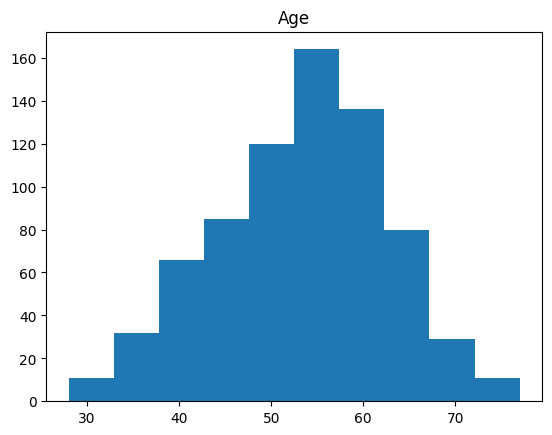

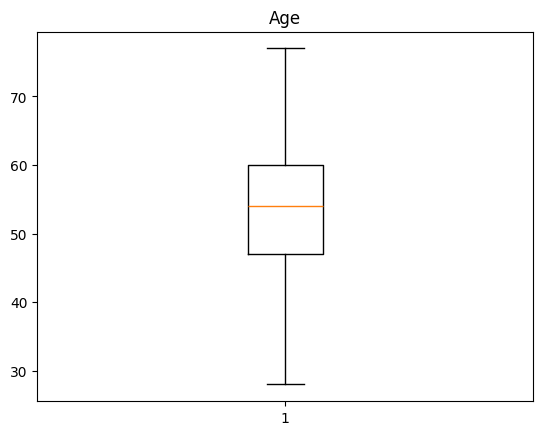

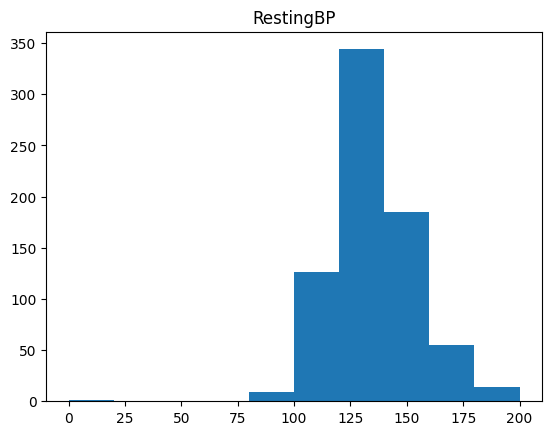

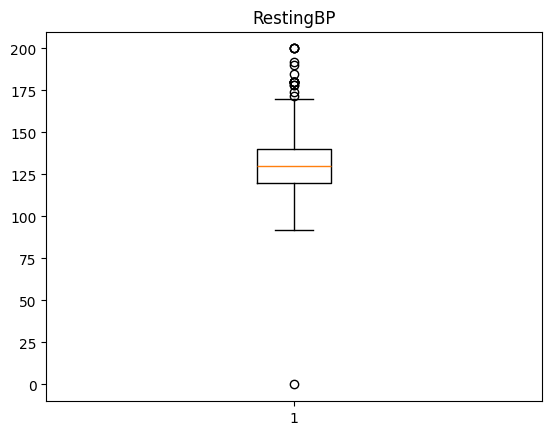

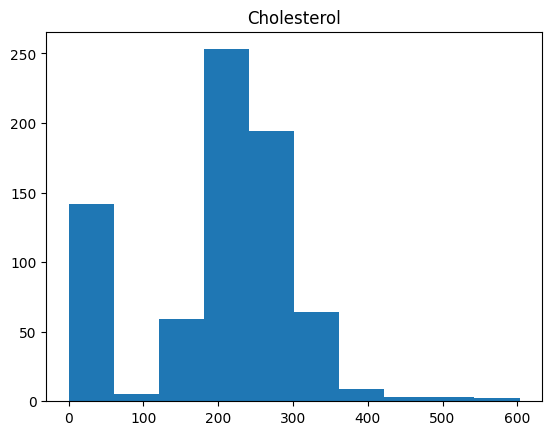

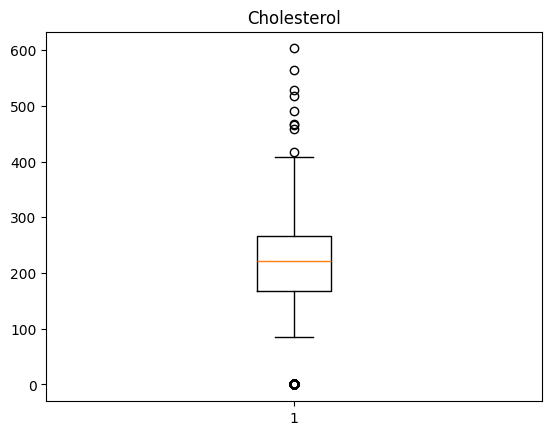

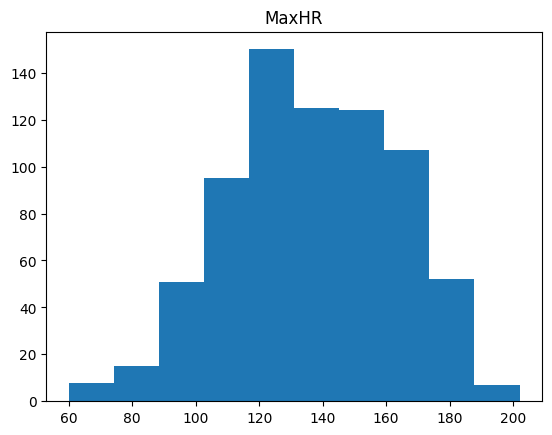

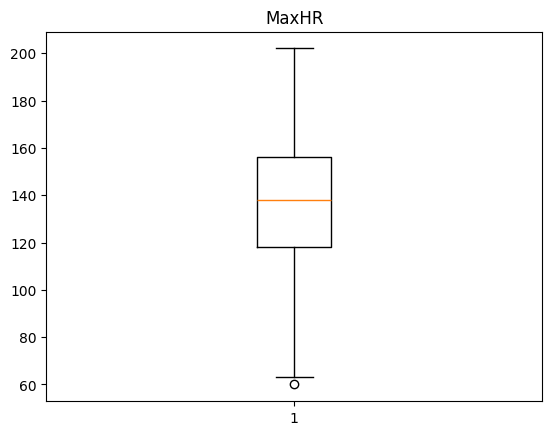

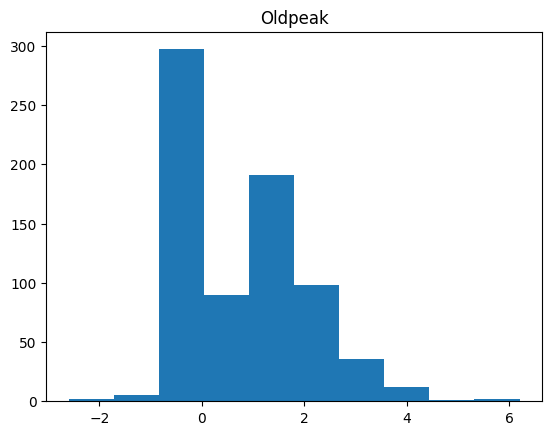

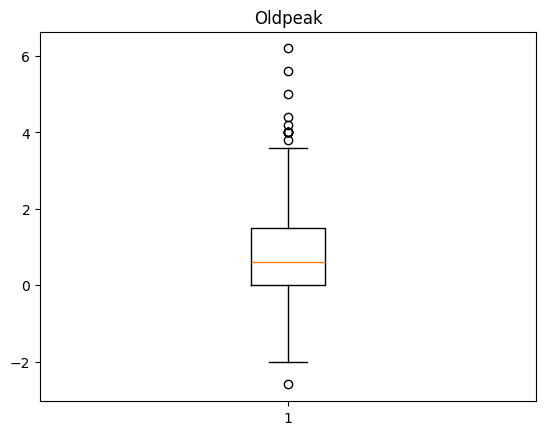

In [30]:
train_data_num = train [["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]]
for i in ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]:
    plt.hist(train_data_num[i])
    plt.title(i)
    plt.show()
    plt.boxplot(train_data_num[i])
    plt.title(i)
    plt.show()

<Axes: >

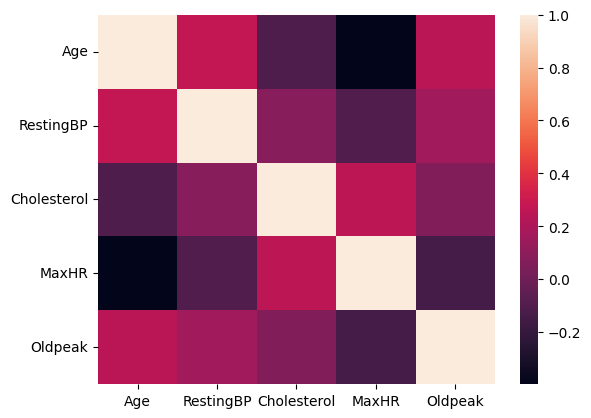

In [31]:
sns.heatmap(train_data_num.corr())

In [32]:
pd.pivot_table(train, index="HeartDisease", values=["Age","RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"])

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,RestingBP
HeartDisease,,,,,,
0,50.464615,225.624615,0.107692,148.544615,0.430462,129.267692
1,55.684597,174.628362,0.332518,127.640587,1.263081,133.801956


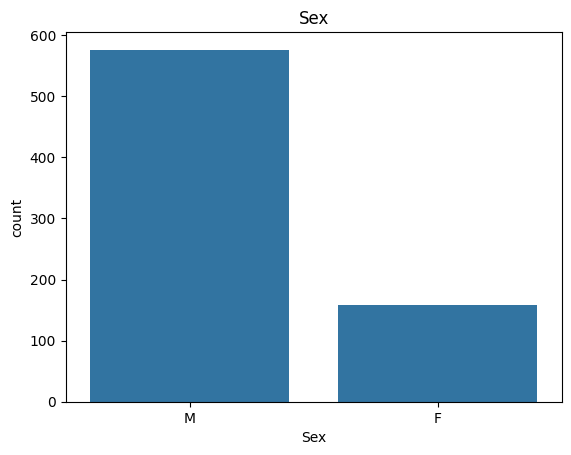

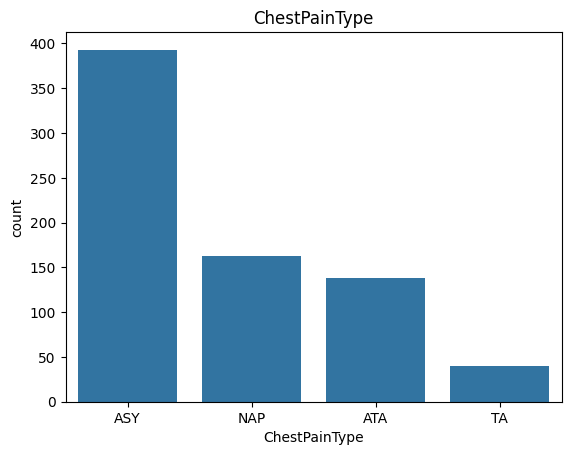

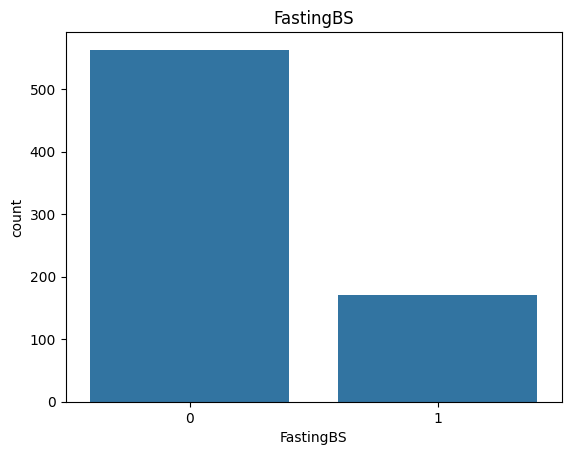

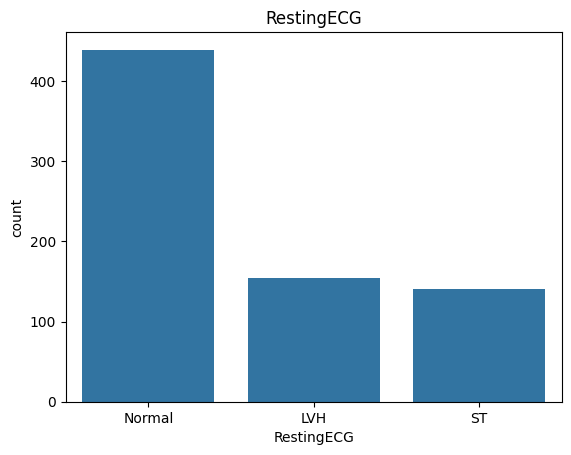

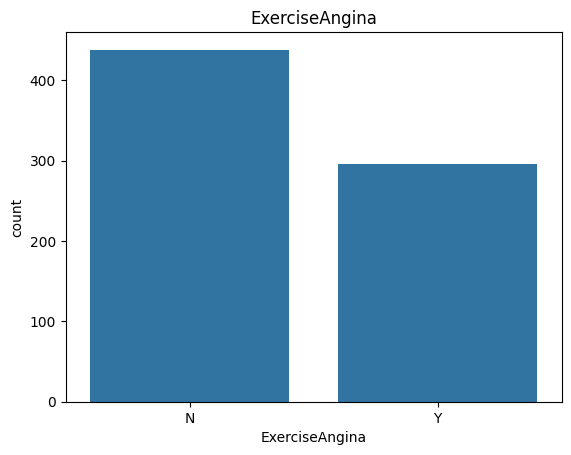

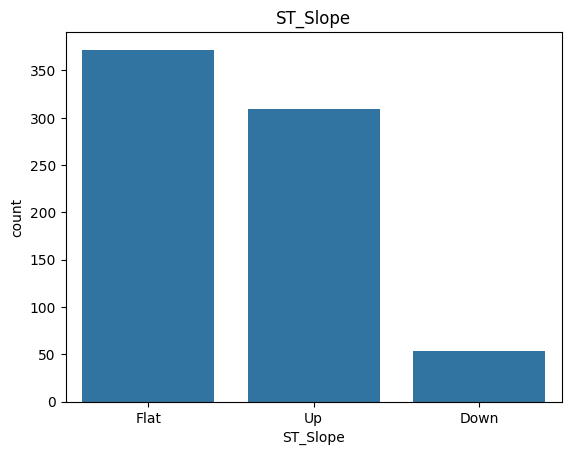

In [33]:
train_data_quali = train[['Sex','ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]

for info in train_data_quali.columns:
  sns.barplot(x=train_data_quali[info].value_counts().index, y=train_data_quali[info].value_counts()).set_title(info)
  plt.show()

In [34]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train.head(20)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
908,63,140,187,0,144,4.0,1,False,True,True,...,False,False,True,False,False,False,True,False,False,True
369,63,150,0,0,86,2.0,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
729,42,120,295,0,162,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
515,63,130,0,1,160,3.0,0,False,True,False,...,True,False,False,False,True,True,False,False,True,False
194,41,125,184,0,180,0.0,0,True,False,False,...,False,False,False,True,False,True,False,False,False,True
501,63,130,308,0,138,2.0,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
658,46,101,197,1,156,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
98,56,120,85,0,140,0.0,0,False,True,True,...,False,False,False,True,False,True,False,False,False,True
528,49,131,142,0,127,1.5,1,False,True,False,...,True,False,False,True,False,False,True,False,True,False
542,54,138,274,0,105,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False


In [36]:
x_train = train.drop(columns = ["HeartDisease"])
y_train = train["HeartDisease"]

x_test = test.drop(columns = ["HeartDisease"])
y_test = test["HeartDisease"]

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

model = LogisticRegression()

model = model.fit(x_train, y_train)
predicted = model.predict(x_test)
results = confusion_matrix(y_test, predicted) 

print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, predicted) )
print ('Report : ')
print( classification_report(y_test, predicted) )

Confusion Matrix :
[[71 14]
 [ 9 90]]
Accuracy Score : 0.875
Report : 
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        85
           1       0.87      0.91      0.89        99

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



d:\Work\Job\RefonteInfiniti.com\GitHub Projects\Demos\Week3Seesion1_\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
def sur(model, Age=25, RestingBP=140, Cholesterol=150, FastingBS=0, MaxHR=120, Oldpeak=0.5, HeartDisease=0, Sex_F=True, Sex_M=False, ChestPainType_ASY=False, ChestPainType_NAP=False, ChestPainType_TA=False, RestingECG_LVH=True, RestingECG_Normal=False, RestingECG_ST=False, ExerciseAngina_N=True, ExerciseAngina_Y=False, ST_Slope_Down=True, ST_Slope_Flat=True, ST_Slope_Up=False):
    x = np.array([ Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease, Sex_F, Sex_M, ChestPainType_ASY, ChestPainType_NAP, ChestPainType_TA, RestingECG_LVH, RestingECG_Normal, RestingECG_ST, ExerciseAngina_N, ExerciseAngina_Y, ST_Slope_Down, ST_Slope_Flat, ST_Slope_Up]).reshape(1, 20)
    print(model.predict(x))
    print(model.predict_proba(x))

In [46]:
sur(model=model)

[1]
[[0.27906889 0.72093111]]


d:\Work\Job\RefonteInfiniti.com\GitHub Projects\Demos\Week3Seesion1_\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\Work\Job\RefonteInfiniti.com\GitHub Projects\Demos\Week3Seesion1_\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
